# Introduction
In this notebook I tried to practice unsupervised learning.

1. [Entering Data and Preparing Data](#1)
1. [Real Data](#2)
1. [Unsupervised Data Appearance](#3)
1. [K-means Clustering](#4)
1. [Hierarchycal Clustering](#5)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


<a id="1"></a><br>
# Entering Data and Preparing Data

In [2]:
data=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_new=data.drop(["Id","PetalLengthCm","PetalWidthCm","Species"],axis=1)

data_new2=data.drop(["Id","SepalLengthCm","SepalWidthCm","Species"],axis=1)

<a id="2"></a><br>
# Real Data

In [5]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

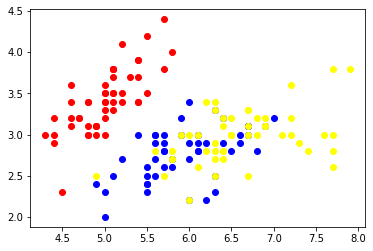

In [6]:
plt.scatter(data.SepalLengthCm[data.Species=="Iris-setosa"],data.SepalWidthCm[data.Species=="Iris-setosa"],color=("red"))
plt.scatter(data.SepalLengthCm[data.Species=="Iris-versicolor"],data.SepalWidthCm[data.Species=="Iris-versicolor"],color=("blue"))
plt.scatter(data.SepalLengthCm[data.Species=="Iris-virginica"],data.SepalWidthCm[data.Species=="Iris-virginica"],color=("yellow"))
plt.show()

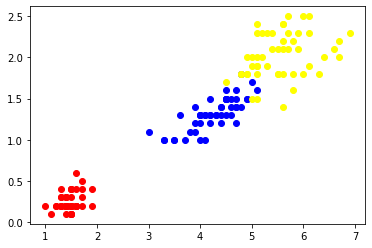

In [7]:
plt.scatter(data.PetalLengthCm[data.Species=="Iris-setosa"],data.PetalWidthCm[data.Species=="Iris-setosa"],color=("red"))
plt.scatter(data.PetalLengthCm[data.Species=="Iris-versicolor"],data.PetalWidthCm[data.Species=="Iris-versicolor"],color=("blue"))
plt.scatter(data.PetalLengthCm[data.Species=="Iris-virginica"],data.PetalWidthCm[data.Species=="Iris-virginica"],color=("yellow"))
plt.show()

<a id = "3"></a><br>
# Unsupervised Data Appearance

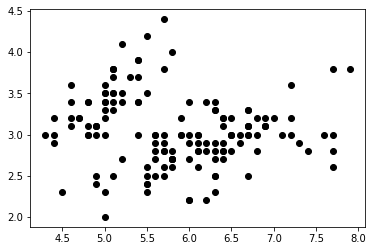

In [8]:


plt.scatter(data_new.SepalLengthCm,data_new.SepalWidthCm,color="black")
plt.show()

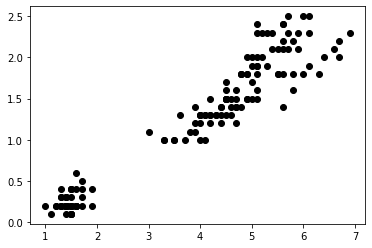

In [9]:
plt.scatter(data_new2.PetalLengthCm,data_new2.PetalWidthCm,color="black")
plt.show()

<a id="4"></a><br>
# K-means Clustering

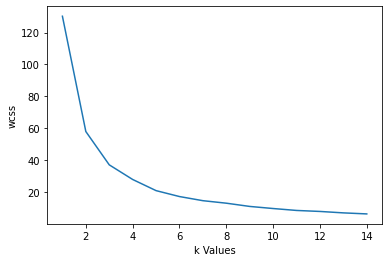

In [10]:
from sklearn.cluster import KMeans

wcss=[]

for k in range(1,15):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("k Values")
plt.ylabel("wcss")
plt.show()

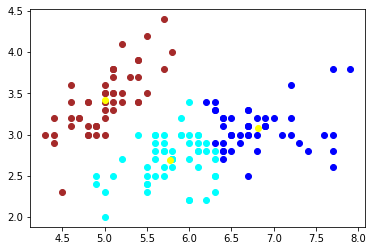

In [11]:
kmeans2=KMeans(n_clusters=3)
Clusters=kmeans2.fit_predict(data_new)
data_new["label"]=Clusters

plt.scatter(data_new.SepalLengthCm[data_new.label==0],data_new.SepalWidthCm[data_new.label==0],color=("brown"))
plt.scatter(data_new.SepalLengthCm[data_new.label==1],data_new.SepalWidthCm[data_new.label==1],color=("blue"))
plt.scatter(data_new.SepalLengthCm[data_new.label==2],data_new.SepalWidthCm[data_new.label==2],color=("cyan"))
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()

<a id="5"></a><br>
# Hierarchycal Clustering

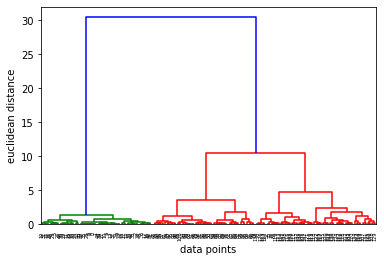

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg=linkage(data_new2,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

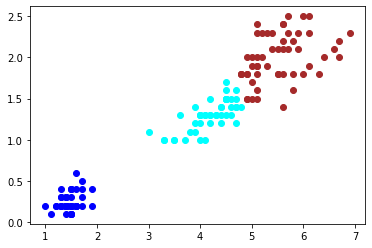

In [13]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster=hc.fit_predict(data_new2)
data_new2["label"]=cluster

plt.scatter(data_new2.PetalLengthCm[data_new2.label==0],data_new2.PetalWidthCm[data_new2.label==0],color=("brown"))
plt.scatter(data_new2.PetalLengthCm[data_new2.label==1],data_new2.PetalWidthCm[data_new2.label==1],color=("blue"))
plt.scatter(data_new2.PetalLengthCm[data_new2.label==2],data_new2.PetalWidthCm[data_new2.label==2],color=("cyan"))

plt.show()